In [1]:
# CIFAR-10 데이터셋 : 10가지 사물이 담긴 컬러 이미지
# 비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭 등 6만 장(학습용 5만, 검증용 1만)
# 32×32 이미지
# 32×32×3 컬러 이미지
from tensorflow.keras import datasets, utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Dropout

def make_data():
    # 다운로드 경로 : 사용자 계정 디렉토리 하위의 .keras 디렉토리
    (X_train, y_train),(X_test, y_test)=datasets.cifar10.load_data()
    # 원핫인코딩 처리
    y_train=utils.to_categorical(y_train,10)
    y_test=utils.to_categorical(y_test,10)
    # 데이터 정규화
    X_train=X_train.astype('float32')
    X_test=X_test.astype('float32')
    X_train/=255
    X_test/=255
    return (X_train, y_train),(X_test, y_test)

In [10]:
from tensorflow.keras import optimizers

def make_model():
    model=Sequential()
    model.add(Conv2D(32,(3,3),padding='same',input_shape=X_train.shape[1:], activation='relu')) # convolution layer1
    # padding='same' : 출력 크기를 입력 크기와 같게 유지
    model.add(Conv2D(32,(3,3),activation='relu')) # convolution layer2
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25)) # 드롭아웃 : 과적합을 방지하기 위한 처리
    model.add(Conv2D(64,(3,3),activation='relu',padding='same')) # convolution layer3
    model.add(Conv2D(64,(3,3),activation='relu')) # convolution layer4
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10,activation='softmax')) # 출력층
    opt=optimizers.RMSprop(lr=0.0001, decay=1e-6) # 학습률 0.0001, decay : 학습 속도를 감소시키는 옵션
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [3]:
import matplotlib.pyplot as plt

a=isinstance(1, int) # True
b=isinstance(1.2, float) # True

def plot_loss(history, title=None):
    if not isinstance(history, dict): # history가 dict 타입이 아니면
        history=history.history
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None: # 타이틀이 설정되어있지 않으면
        plt.title(title)
    plt.xlabel('에포크')
    plt.ylabel('손실')
    plt.legend(['학습 데이터 성능','검증 데이터 성능'], loc=0)

def plot_acc(history, title=None):
    if not isinstance(history, dict): # history가 dict 타입이 아니면
        history=history.history
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None: # 타이틀이 설정되어있지 않으면
        plt.title(title)
    plt.xlabel('에포크')
    plt.ylabel('정확도')
    plt.legend(['학습 데이터 성능','검증 데이터 성능'], loc=0)

In [4]:
(X_train, y_train),(X_test, y_test)=make_data()

170500096/170498071 [==============================] - 41s 0us/step


In [6]:
X_train.shape[1:]

(32, 32, 3)

In [7]:
X_train.shape

(50000, 32, 32, 3)

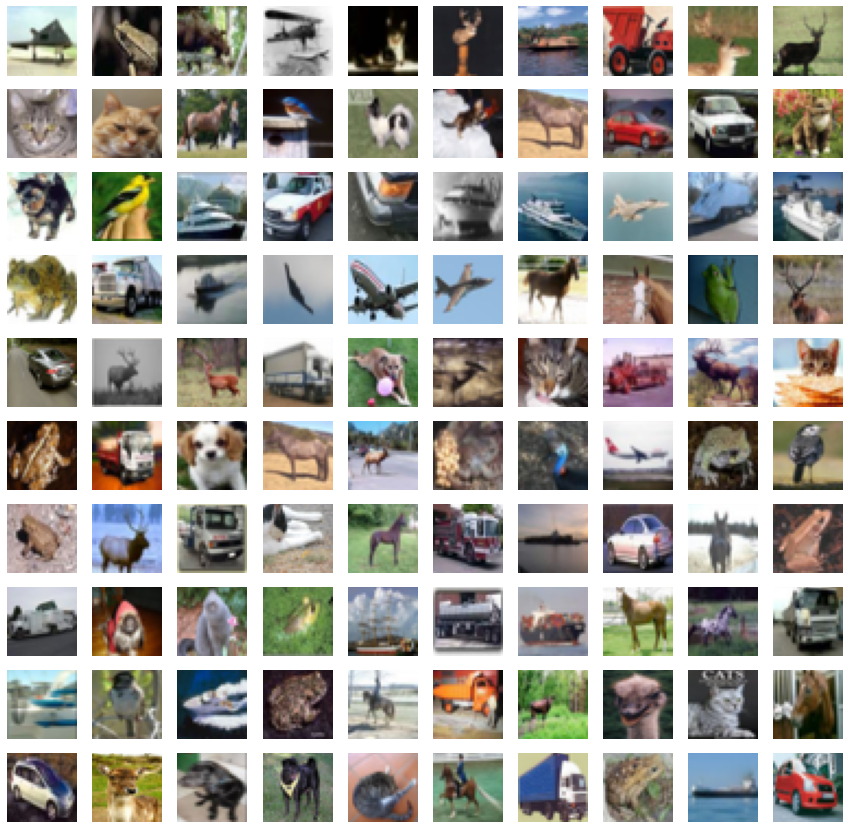

In [8]:
from six.moves import cPickle
import numpy as np

f=open('c:/users/user/.keras/datasets/cifar-10-batches-py/data_batch_1','rb')
datadict=cPickle.load(f, encoding='latin1')
X=datadict['data']
y=datadict['labels']
X=X.reshape(10000,3,32,32).transpose(0,2,3,1).astype('uint8')
y=np.array(y)

fig, axes1=plt.subplots(10,10,figsize=(15,15))
for j in range(10):
    for k in range(10):
        i=np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0])

In [11]:
model=make_model() # 모델 생성

In [12]:
history=model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.2)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1250/1250 [==============================] - 78s 61ms/step - loss: 1.9845 - accuracy: 0.2759 - val_loss: 1.5532 - val_accuracy: 0.4385
Epoch 2/3
1250/1250 [==============================] - 75s 60ms/step - loss: 1.5260 - accuracy: 0.4495 - val_loss: 1.4031

In [13]:
# 성능 평가
performance_test=model.evaluate(X_test,y_test,batch_size=100)
print(performance_test)

100/100 [==============================] - 3s 24ms/step - loss: 1.3406 - accuracy: 0.5233
[1.340638518333435, 0.5232999920845032]


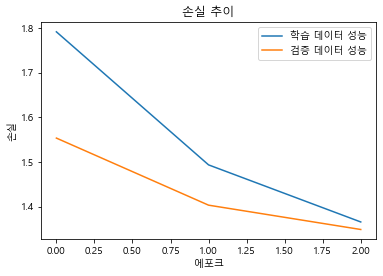

In [14]:
import matplotlib
import matplotlib.font_manager as fm
font_loc='c:/windows/fonts/malgun.ttf'
font_name=fm.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font',family=font_name)

plot_loss(history, '손실 추이')
plt.show()

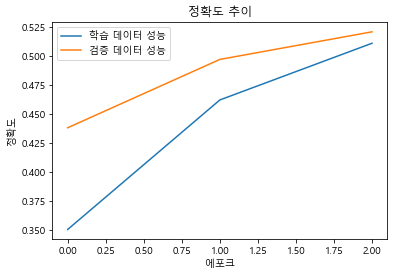

In [15]:
plot_acc(history, '정확도 추이')
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

y_pred=model.predict(X_test, verbose=1)
y_pred=np.argmax(y_pred, axis=1)
cm=confusion_matrix(np.argmax(y_test, axis=1), y_pred)
df_cm=pd.DataFrame(cm, range(10), range(10))
df_cm

313/313 [==============================] - 3s 9ms/step


,0,1,2,3,4,5,6,7,8,9
0,551,30,47,18,65,29,33,58,77,92
1,24,618,5,5,18,8,38,40,21,223
2,50,7,127,31,324,185,126,105,17,28
3,7,11,23,178,133,299,197,109,5,38
4,19,7,17,29,554,80,142,136,8,8
5,3,1,13,49,98,583,97,140,5,11
6,1,3,8,17,111,43,750,53,2,12
7,5,0,9,18,90,111,43,690,4,30
8,151,67,15,15,27,19,31,33,502,140
9,28,96,4,9,12,15,63,79,14,680


In [17]:
model.save('d:/data/cifar')

INFO:tensorflow:Assets written to: d:/data/cifar\assets
